In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cat_mod.models.hmm import HMMFitter

In [2]:
def prepare_data(path, drop_cols, drop_rows, sheet):
    df = pd.read_excel('data/seuqeunces_final_11_06_25.xlsx', sheet_name=sheet)
    df = df.drop(drop_cols, axis=1).drop(drop_rows, axis=0)
    return df.iloc[:, :80], df.iloc[:, 80:]

def map_colours(data, nan=-1, min_count=0):
    colours = data.stack().value_counts()
    col_to_numb = dict()
    for i, col in enumerate(colours.index):
        if colours.loc[col] > min_count:
            col_to_numb[col] = i
        else:
            col_to_numb[col] = nan
    data.replace(col_to_numb, inplace=True)
    data.fillna(nan, inplace=True)
    return data, col_to_numb, colours

In [3]:
results = list()

# No red train

In [5]:
no_red1_train, no_red1_test = prepare_data('data/seuqeunces_final_11_06_25.xlsx', ['name'], [0, 1, 3, 4], sheet=0)
no_red2_train, no_red2_test = prepare_data('data/seuqeunces_final_11_06_25.xlsx', ['name'], [0, 5], sheet=2)
no_red_train = pd.concat([no_red1_train, no_red2_train]).reset_index(drop=True)
no_red_train_num, color_to_num, freqs = map_colours(no_red_train, min_count=3, nan=0)
print(color_to_num)
print(freqs)

{0: 0, 'желтая': 1, 'золотая': 2, 'белая': 3, 'синяя': 4, 'зеленая': 5, 'черная': 6, 'серебряная': 0}
0             1882
желтая         241
золотая        129
белая           97
синяя           82
зеленая         28
черная          17
серебряная       1
Name: count, dtype: int64


/tmp/ipykernel_32415/594870669.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(col_to_numb, inplace=True)


In [106]:
seeds = np.random.randint(10000, size=10)

In [107]:
seeds

array([4641, 5933, 2253, 3278, 1052, 7274, 9424, 1668,  164, 2316])

In [108]:
conf = dict(
    n_components=[1, 2, 3, 4, 5],
    seeds = seeds,
    # n_components = [2],
    # seeds = [42],
    max_iter=1000,
    tol=0.01,
    #filter_colors = [0],
    account_frequencies=False,
    max_cells_per_column=20,
    min_cells_per_column=2,
    verbose=False
)

In [109]:
X = no_red_train.to_numpy().astype(np.int32)

In [110]:
model = HMMFitter(X)
scores = model.fit_model(
    **conf
)

Total data points: 2480, obs states: 7


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.08it/s]

Components f1, total parameters: 8
Components f2, total parameters: 18


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:11<00:21,  7.01s/it]

Components f3, total parameters: 30


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 3/5 [00:25<00:19,  9.91s/it]

Components f4, total parameters: 44


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 4/5 [00:44<00:13, 13.50s/it]

Components f5, total parameters: 60


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:09<00:00, 13.92s/it]


In [111]:
model.scores.groupby(model.scores['n_comp']).agg(['mean', 'std'])

seed                  score                 aic                 bic  \
          mean          std      mean       std      mean       std      mean   
n_comp                                                                          
1       3800.3  2965.362899 -0.912816  0.000000  1.830471  0.000000  1.844542   
2       3800.3  2965.362899 -0.878889  0.020031  1.769874  0.040063  1.805051   
3       3800.3  2965.362899 -0.863457  0.001301  1.747883  0.002601  1.808857   
4       3800.3  2965.362899 -0.862080  0.015233  1.755612  0.030467  1.847074   
5       3800.3  2965.362899 -0.855342  0.004782  1.754233  0.009563  1.880872   

                  
             std  
n_comp            
1       0.000000  
2       0.040063  
3       0.002601  
4       0.030467  
5       0.009563

In [112]:
rng = np.random.default_rng()
X_shuffled = rng.permuted(X, axis=1)

shuffled = HMMFitter(X_shuffled)
scores_shuffled = shuffled.fit_model(
    **conf
)

Total data points: 2480, obs states: 7


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.42it/s]

Components f1, total parameters: 8
Components f2, total parameters: 18


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:08<00:14,  4.78s/it]

Components f3, total parameters: 30


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 3/5 [00:24<00:19,  9.88s/it]

Components f4, total parameters: 44


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 4/5 [00:50<00:16, 16.27s/it]

Components f5, total parameters: 60


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:27<00:00, 17.49s/it]


In [113]:
shuffled.scores.groupby(model.scores['n_comp']).agg(['mean', 'std'])

seed              n_comp          score                 aic  \
          mean          std   mean  std      mean       std      mean   
n_comp                                                                  
1       3800.3  2965.362899    1.0  0.0 -0.912816  0.000000  1.830471   
2       3800.3  2965.362899    2.0  0.0 -0.908156  0.005832  1.828408   
3       3800.3  2965.362899    3.0  0.0 -0.905584  0.006451  1.832135   
4       3800.3  2965.362899    4.0  0.0 -0.902258  0.008292  1.835967   
5       3800.3  2965.362899    5.0  0.0 -0.894810  0.005568  1.833169   

                       bic            
             std      mean       std  
n_comp                                
1       0.000000  1.844542  0.000000  
2       0.011665  1.863586  0.011665  
3       0.012902  1.893110  0.012902  
4       0.016584  1.927428  0.016584  
5       0.011136  1.959808  0.011136

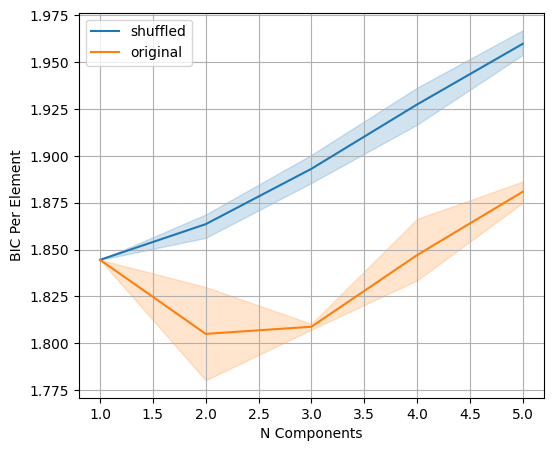

In [114]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.lineplot(shuffled.scores, x='n_comp', y='bic', ax=ax, label='shuffled')
sns.lineplot(model.scores, x='n_comp', y='bic', ax=ax, label='original')
plt.grid()
ax.set_xlabel('N Components')
ax.set_ylabel('BIC Per Element')
plt.savefig('bic_no_red_train.png')

In [115]:
y_labels = ['food', 'yellow', 'golden', 'white', 'blue', 'green', 'black']

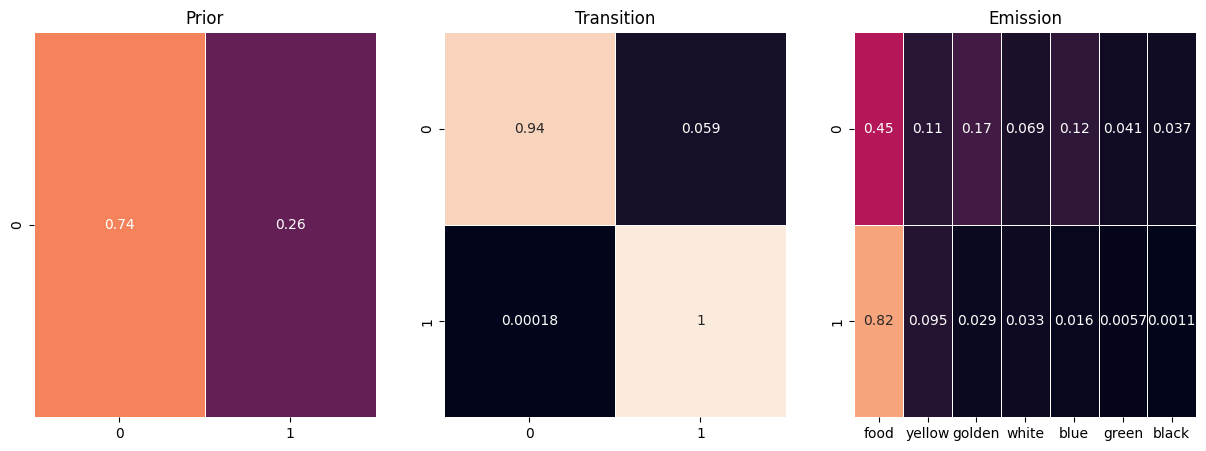

In [119]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
cfg = dict(
    linewidths=0.5, linecolor='white', vmin=0, vmax=1.0, annot=True, cbar=None
)
sns.heatmap(model.model.startprob_[None], ax=ax[0], **cfg)
ax[0].set_title('Prior')
sns.heatmap(model.model.transmat_, ax=ax[1], **cfg)
ax[1].set_title('Transition')
sns.heatmap(model.model.emissionprob_, ax=ax[2], **cfg)
ax[2].set_title('Emission')
ax[2].set_xticklabels(y_labels)
plt.savefig('matrices_no_red_train.png')

In [117]:
# add bars with frequency realtions
# 1. decode sequences
# 2. split them in two phases
# 3. compute average frequences over phases for all sequnces

In [120]:
model.model.algorithm

'viterbi'

In [136]:
model.model.algorithm='map'

In [137]:
likelihood, X_decoded = model.model.decode(X.flatten()[:, None], lengths=[X.shape[1]] * X.shape[0])

In [138]:
X_decoded = X_decoded.reshape(X.shape)

In [171]:
freqs_pre = np.zeros(model.model.n_features)
freqs_post = np.zeros(model.model.n_features)
for dec_seq, seq in zip(X_decoded, X):
    clrs_pre, counts_pre = np.unique(seq[~dec_seq.astype(np.bool)], return_counts=True)
    freqs_pre[clrs_pre] += counts_pre
    clrs_post, counts_post = np.unique(seq[dec_seq.astype(np.bool)], return_counts=True)
    freqs_post[clrs_post] += counts_post

In [172]:
freqs_pre

array([160.,  45.,  69.,  26.,  49.,  16.,  15.])

In [173]:
freqs_post

array([1726.,  196.,   60.,   71.,   33.,   12.,    2.])

In [174]:
from statsmodels.stats.proportion import multinomial_proportions_confint
intervals_pre = multinomial_proportions_confint(freqs_pre, method='goodman')
print(intervals_pre)

[[0.35501721 0.49003879]
 [0.08081015 0.17029387]
 [0.13449565 0.24056357]
 [0.04104325 0.11192957]
 [0.08954456 0.18221865]
 [0.02190554 0.07941929]
 [0.0201044  0.07605563]]


In [175]:
intervals_post = multinomial_proportions_confint(freqs_post, method='goodman')
print(intervals_post)

[[7.98351283e-01 8.43247265e-01]
 [7.76255040e-02 1.11834319e-01]
 [2.02940542e-02 4.00867705e-02]
 [2.46985379e-02 4.61224999e-02]
 [9.90185572e-03 2.48529915e-02]
 [2.67960477e-03 1.21439266e-02]
 [1.75273885e-04 5.15715475e-03]]


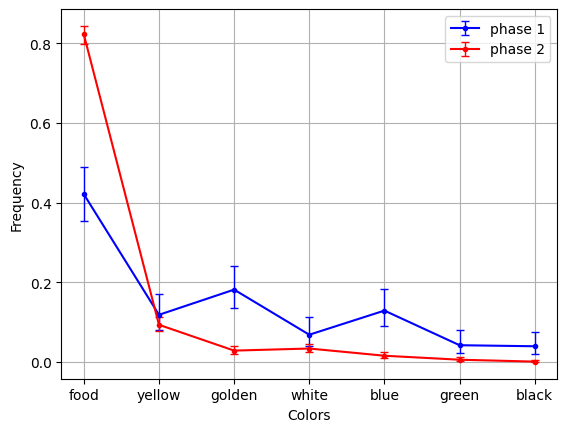

In [194]:
freqs_pre /= freqs_pre.sum()
freqs_post /= freqs_post.sum()
x = np.arange(freqs_pre.size)
ecfg = dict(capsize=3, elinewidth=1, capthick=1, fmt='.-')
plt.errorbar(x, freqs_pre, yerr=np.array([(f-ci[0], ci[1]-f) for f, ci in zip(freqs_pre, intervals_pre)]).T, label='phase 1', color='b', **ecfg)
plt.errorbar(x, freqs_post, yerr=np.array([(f-ci[0], ci[1]-f) for f, ci in zip(freqs_post, intervals_post)]).T, label='phase 2', color='r', **ecfg)
plt.legend()
plt.grid()
plt.xticks(ticks=x, labels=y_labels)
plt.xlabel('Colors')
plt.ylabel('Frequency')
plt.savefig('no_red_train_freqs.png')

In [143]:
X[0]

array([0, 0, 0, 4, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 5, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [144]:
X_decoded[0]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [155]:
X[16]

array([1, 1, 1, 4, 4, 4, 3, 4, 6, 4, 6, 4, 2, 1, 0, 3, 2, 0, 2, 2, 2, 0,
       0, 0, 0, 0, 2, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0], dtype=int32)

In [156]:
X_decoded[16]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# No red, no food

In [58]:
conf = dict(
    n_components=[1, 2, 3, 4, 5],
    seeds = [32, 432, 333, 4324, 86958],
    # n_components = [2],
    # seeds = [42],
    max_iter=1000,
    tol=0.01,
    filter_colors = [0],
    account_frequencies=False,
    max_cells_per_column=20,
    min_cells_per_column=2,
    verbose=False
)

In [59]:
model_no_food = HMMFitter(X)
scores = model_no_food.fit_model(
    **conf
)

Total data points: 594, obs states: 6


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

Components f1, total parameters: 7
Components f2, total parameters: 16


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:03<00:05,  1.88s/it]

Components f3, total parameters: 27


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 3/5 [00:09<00:06,  3.36s/it]

Components f4, total parameters: 40


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 4/5 [00:15<00:04,  4.38s/it]

Components f5, total parameters: 55


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.45s/it]


In [60]:
model_no_food.scores.groupby(model_no_food.scores['n_comp']).agg(['mean', 'std'])

seed                   score                 aic            \
           mean           std      mean       std      mean       std   
n_comp                                                                  
1       18415.8  38356.814352 -1.512610  0.000000  3.042054  0.000000   
2       18415.8  38356.814352 -1.468494  0.028258  2.980760  0.056516   
3       18415.8  38356.814352 -1.447152  0.025759  2.971744  0.051518   
4       18415.8  38356.814352 -1.413870  0.010035  2.945586  0.020070   
5       18415.8  38356.814352 -1.405673  0.016536  2.976329  0.033072   

             bic            
            mean       std  
n_comp                      
1       3.078981  0.000000  
2       3.076769  0.056516  
3       3.141607  0.051518  
4       3.204072  0.020070  
5       3.338210  0.033072

In [61]:
shuffled_no_food = HMMFitter(X_shuffled)
scores_shuffled = shuffled_no_food.fit_model(
    **conf
)

Total data points: 594, obs states: 6


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

Components f1, total parameters: 7
Components f2, total parameters: 16


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:03<00:04,  1.57s/it]

Components f3, total parameters: 27


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 3/5 [00:06<00:05,  2.51s/it]

Components f4, total parameters: 40


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 4/5 [00:12<00:03,  3.66s/it]

Components f5, total parameters: 55


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.09s/it]


In [56]:
shuffled_no_food.scores.groupby('n_comp').agg(['mean', 'std'])

seed                   score                 aic            \
           mean           std      mean       std      mean       std   
n_comp                                                                  
1       18415.8  38356.814352 -1.512610  0.000000  3.042054  0.000000   
2       18415.8  38356.814352 -1.482738  0.014409  3.009247  0.028818   
3       18415.8  38356.814352 -1.486026  0.018328  3.049493  0.036657   
4       18415.8  38356.814352 -1.458900  0.010931  3.035645  0.021863   
5       18415.8  38356.814352 -1.433069  0.009664  3.031122  0.019328   
7       18415.8  38356.814352 -1.431972  0.008739  3.143406  0.017478   
10      18415.8  38356.814352 -1.393052  0.016912  3.287787  0.033824   

             bic            
            mean       std  
n_comp                      
1       3.078981  0.000000  
2       3.105256  0.028818  
3       3.219355  0.036657  
4       3.294131  0.021863  
5       3.393003  0.019328  
7       3.756387  0.017478  
10      4.388199  0.033824

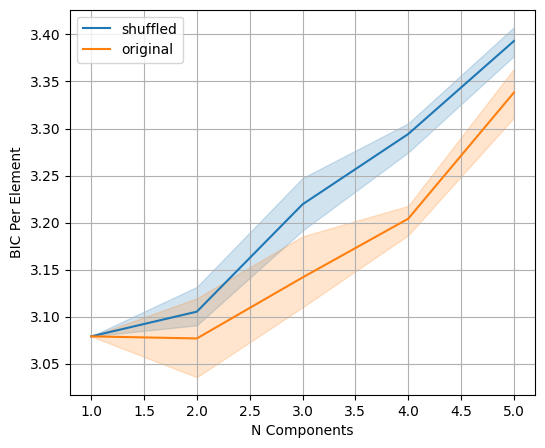

In [62]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.lineplot(shuffled_no_food.scores, x='n_comp', y='bic', ax=ax, label='shuffled')
sns.lineplot(model_no_food.scores, x='n_comp', y='bic', ax=ax, label='original')
plt.grid()
ax.set_xlabel('N Components')
ax.set_ylabel('BIC Per Element')
plt.savefig('bic_no_red_train_no_food.png')

In [68]:
conf['n_components'] = [2]
conf['seeds'] = [243, 42, 234, 1124, 44980]
model_no_food = HMMFitter(X)
scores = model_no_food.fit_model(
    **conf
)

Total data points: 594, obs states: 6


  0%|                                                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

Components f2, total parameters: 16


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.85s/it]


In [63]:
y_labels = ['food', 'yellow', 'golden', 'white', 'blue', 'green', 'black']

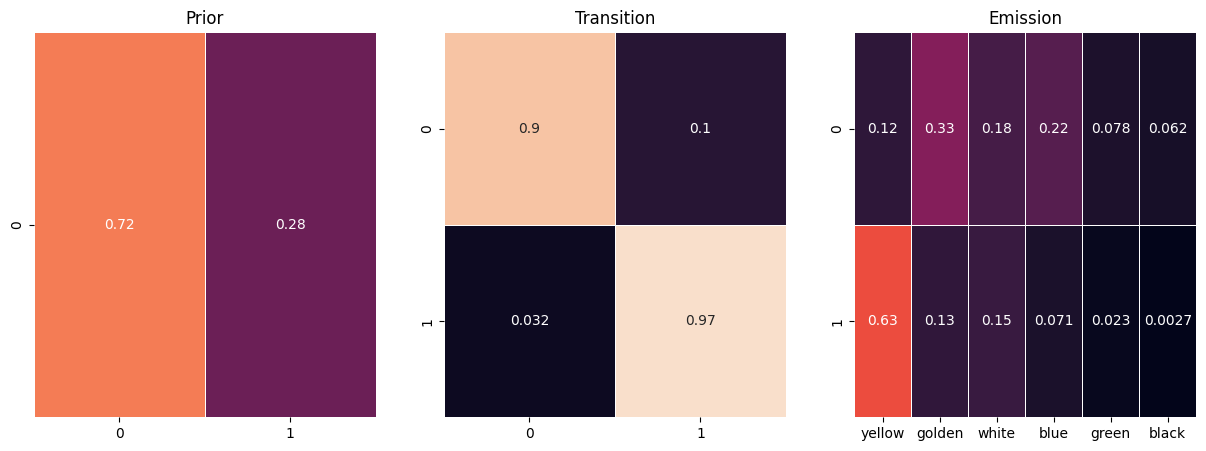

In [69]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
cfg = dict(
    linewidths=0.5, linecolor='white', vmin=0, vmax=1.0, annot=True, cbar=None
)
sns.heatmap(model_no_food.model.startprob_[None], ax=ax[0], **cfg)
ax[0].set_title('Prior')
sns.heatmap(model_no_food.model.transmat_, ax=ax[1], **cfg)
ax[1].set_title('Transition')
sns.heatmap(model_no_food.model.emissionprob_, ax=ax[2], **cfg)
ax[2].set_title('Emission')
ax[2].set_xticklabels(y_labels[1:])
plt.savefig('matrices_no_food.png')

In [66]:
conf['n_components'] = [2]
shuffled_no_food = HMMFitter(X_shuffled)
scores_shuffled = shuffled_no_food.fit_model(
    **conf
)

Total data points: 594, obs states: 6


  0%|                                                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

Components f2, total parameters: 16


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.20s/it]


[Text(0.5, 0, 'yellow'),
 Text(1.5, 0, 'golden'),
 Text(2.5, 0, 'white'),
 Text(3.5, 0, 'blue'),
 Text(4.5, 0, 'green'),
 Text(5.5, 0, 'black')]

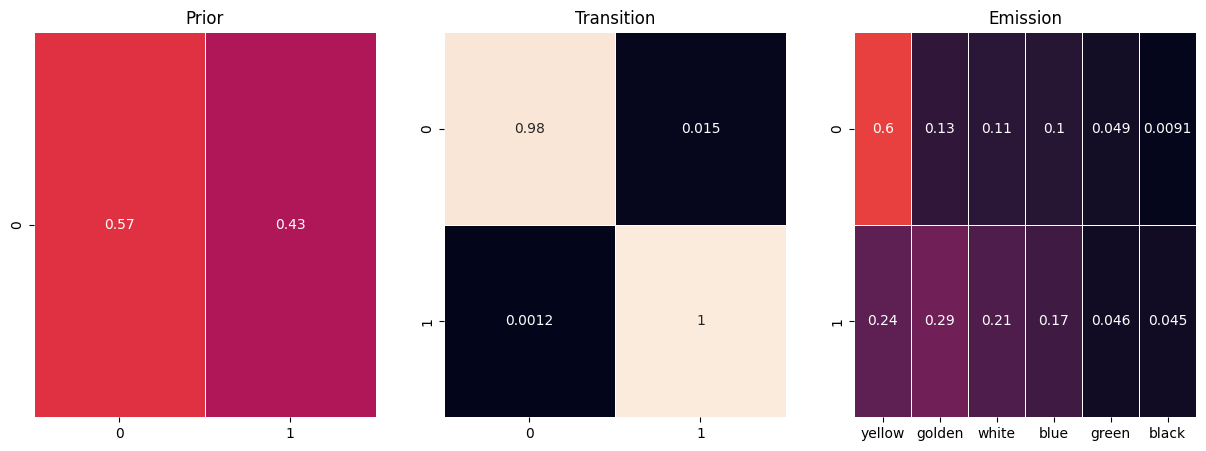

In [67]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
cfg = dict(
    linewidths=0.5, linecolor='white', vmin=0, vmax=1.0, annot=True, cbar=None
)
sns.heatmap(shuffled_no_food.model.startprob_[None], ax=ax[0], **cfg)
ax[0].set_title('Prior')
sns.heatmap(shuffled_no_food.model.transmat_, ax=ax[1], **cfg)
ax[1].set_title('Transition')
sns.heatmap(shuffled_no_food.model.emissionprob_, ax=ax[2], **cfg)
ax[2].set_title('Emission')
ax[2].set_xticklabels(y_labels[1:])